In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data= pd.read_csv("/content/synthetic_ecommerce_orders_raw.csv")

In [37]:
data.head(11)

,order_id,customer_id,order_date,age,gender,city_tier,signup_channel,device_type,category,payment_method,order_value,discount_pct,shipping_days,delivery_status,rating,return_flag,support_tickets,session_duration_min
0,500000,10117,2025-07-10,29.0,Female,Tier-1,REFERRAL,iOS,Grocery,COD,30.65,16.4,4.0,Delivered,5.0,0,0.0,21.3
1,500001,10339,2025-11-17,36.0,Male,Tier-1,Partner,Android,Fashion,COD,34.20,30.6,4.0,Delivered,3.0,0,0.0,19.0
2,500002,10388,2025-08-15,18.0,Male,Tier-3,Partner,Web,Fashion,UPI,40.74,28.7,5.0,Delivered,5.0,0,0.0,16.1
3,500003,10192,2025-07-30,49.0,Male,Tier-1,Organic,iOS,Beauty,Wallet,49.63,22.4,3.0,Delivered,4.0,0,0.0,10.5
4,500004,10398,2025-10-02,24.0,Female,Tier-1,Organic,Android,Grocery,NetBanking,63.63,9.0,3.0,Delivered,5.0,0,0.0,12.4
5,500005,10345,2025-08-01,30.0,Female,Tier-3,Paid,Web,Sports,Card,39.95,27.7,5.0,Delivered,5.0,0,0.0,20.0
6,500006,10194,2025-08-16,18.0,Female,Tier-2,Paid,iOS,Electronics,COD,44.62,25.0,5.0,Delivered,3.0,0,0.0,17.2
7,500007,10167,2025-09-26,35.0,Male,Tier-3,Paid,Android,beauty,UPI,28.39,26.0,5.0,Delivered,5.0,0,1.0,13.8
8,500008,10376,2025-09-01,20.0,Male,Tier-1,Referral,iOS,Home,COD,134.36,23.3,4.0,Delivered,4.0,0,0.0,13.6
9,500009,10238,2025-12-01,31.0,Male,Tier-2,Organic,Android,Home,UPI,92.68,17.8,6.0,Delivered,4.0,0,0.0,17.0


In [38]:
data.tail()

,order_id,customer_id,order_date,age,gender,city_tier,signup_channel,device_type,category,payment_method,order_value,discount_pct,shipping_days,delivery_status,rating,return_flag,support_tickets,session_duration_min
2015,501747,10200,2025-07-11,24.0,Female,Tier-2,Partner,Web,electronics,card,49.79,17.1,6.0,Delivered,4.0,1,0.0,18.3
2016,501696,10250,2025-08-19,45.0,Female,Tier-3,Paid,Android,Grocery,upi,16.67,19.2,5.0,Delivered,4.0,0,0.0,17.5
2017,500311,10217,2025-12-23,52.0,Female,Tier-3,Partner,iOS,Fashion,upi,11.75,27.5,5.0,Delivered,4.0,0,0.0,17.9
2018,500784,10111,2025-12-07,NaN,Female,Tier-3,Paid,Web,Home,netbanking,47.59,28.8,5.0,Delivered,5.0,0,0.0,18.1
2019,500646,10331,2025-12-24,22.0,Male,Tier-3,Referral,Web,Sports,card,26.04,22.1,5.0,Delivered,5.0,0,1.0,16.2


In [39]:
data.shape

(2020, 18)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              2020 non-null   int64  
 1   customer_id           2020 non-null   int64  
 2   order_date            2020 non-null   object 
 3   age                   1951 non-null   float64
 4   gender                2020 non-null   object 
 5   city_tier             2020 non-null   object 
 6   signup_channel        2020 non-null   object 
 7   device_type           2020 non-null   object 
 8   category              2020 non-null   object 
 9   payment_method        2020 non-null   object 
 10  order_value           2020 non-null   float64
 11  discount_pct          1975 non-null   float64
 12  shipping_days         1975 non-null   float64
 13  delivery_status       2020 non-null   object 
 14  rating                1994 non-null   float64
 15  return_flag          

In [42]:
data.dtypes

,0
order_id,int64
customer_id,int64
order_date,object
age,float64
gender,object
city_tier,object
signup_channel,object
device_type,object
category,object
payment_method,object


In [49]:
data.describe()

,order_id,customer_id,age,order_value,discount_pct,shipping_days,rating,return_flag,support_tickets,session_duration_min
count,2020.000000,2020.000000,1951.000000,2020.000000,1975.000000,1975.000000,1994.000000,2020.000000,2020.000000,2020.000000
mean,500999.421287,10197.059406,30.282419,50.712688,20.914430,4.814684,3.959880,0.097030,0.337129,16.019356
std,578.079557,116.553743,7.658660,42.225425,5.963624,1.183339,0.846702,0.296072,0.641713,3.559457
min,500000.000000,10000.000000,18.000000,-108.380000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,500498.750000,10096.000000,25.000000,26.947500,17.100000,4.000000,3.000000,0.000000,0.000000,13.700000
50%,500998.500000,10197.000000,30.000000,40.140000,20.900000,5.000000,4.000000,0.000000,0.000000,16.100000
75%,501501.250000,10299.000000,35.000000,60.497500,24.900000,6.000000,5.000000,0.000000,1.000000,18.500000
max,501999.000000,10399.000000,56.000000,455.010000,41.500000,13.000000,5.000000,1.000000,5.000000,27.700000


In [53]:
missing=data.isna().sum()
print(missing)

order_id                 0
customer_id              0
order_date               0
age                     69
gender                   0
city_tier                0
signup_channel           0
device_type              0
category                 0
payment_method           0
order_value              0
discount_pct            45
shipping_days           45
delivery_status          0
rating                  26
return_flag              0
support_tickets          0
session_duration_min     0
dtype: int64


In [55]:
missingsort=data.isna().sum().sort_values(ascending=False)
print(missingsort)

age                     69
discount_pct            45
shipping_days           45
rating                  26
customer_id              0
order_id                 0
signup_channel           0
order_date               0
gender                   0
city_tier                0
payment_method           0
category                 0
device_type              0
order_value              0
delivery_status          0
return_flag              0
support_tickets          0
session_duration_min     0
dtype: int64


In [56]:
duplicates=data.duplicated().sum()
print(duplicates)

0


In [58]:
missing_treated=(data.isna().mean()*100).sort_values(ascending=False)
print(missing_treated)

age                     3.415842
discount_pct            2.227723
shipping_days           2.227723
rating                  1.287129
customer_id             0.000000
order_id                0.000000
signup_channel          0.000000
order_date              0.000000
gender                  0.000000
city_tier               0.000000
payment_method          0.000000
category                0.000000
device_type             0.000000
order_value             0.000000
delivery_status         0.000000
return_flag             0.000000
support_tickets         0.000000
session_duration_min    0.000000
dtype: float64


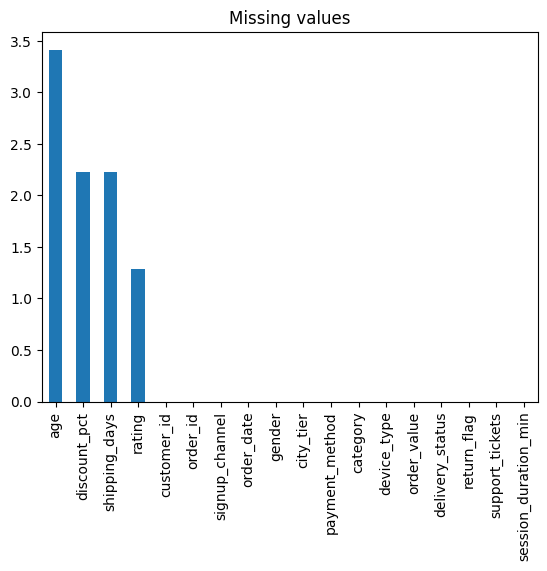

In [59]:
plt.figure()
missing_treated.plot(kind="bar")
plt.title("Missing values")
plt.show()

In [60]:
cat_cols=['category','signup_channel','payment_method','device_type','city_tier','gender','delivery_status']


In [61]:
data[cat_cols]

,category,signup_channel,payment_method,device_type,city_tier,gender,delivery_status
0,Grocery,REFERRAL,COD,iOS,Tier-1,Female,Delivered
1,Fashion,Partner,COD,Android,Tier-1,Male,Delivered
2,Fashion,Partner,UPI,Web,Tier-3,Male,Delivered
3,Beauty,Organic,Wallet,iOS,Tier-1,Male,Delivered
4,Grocery,Organic,NetBanking,Android,Tier-1,Female,Delivered
...,...,...,...,...,...,...,...
2015,electronics,Partner,card,Web,Tier-2,Female,Delivered
2016,Grocery,Paid,upi,Android,Tier-3,Female,Delivered
2017,Fashion,Partner,upi,iOS,Tier-3,Female,Delivered
2018,Home,Paid,netbanking,Web,Tier-3,Female,Delivered


In [63]:
data["category"]=data["category"].str.title()
data["category"]

,category
0,Grocery
1,Fashion
2,Fashion
3,Beauty
4,Grocery
...,...
2015,Electronics
2016,Grocery
2017,Fashion
2018,Home


In [69]:
for col in cat_cols:
  data[col]=data[col].str.strip()
data[cat_cols]

,category,signup_channel,payment_method,device_type,city_tier,gender,delivery_status
0,Grocery,REFERRAL,COD,iOS,Tier-1,Female,Delivered
1,Fashion,Partner,COD,Android,Tier-1,Male,Delivered
2,Fashion,Partner,UPI,Web,Tier-3,Male,Delivered
3,Beauty,Organic,Wallet,iOS,Tier-1,Male,Delivered
4,Grocery,Organic,NetBanking,Android,Tier-1,Female,Delivered
...,...,...,...,...,...,...,...
2015,Electronics,Partner,card,Web,Tier-2,Female,Delivered
2016,Grocery,Paid,upi,Android,Tier-3,Female,Delivered
2017,Fashion,Partner,upi,iOS,Tier-3,Female,Delivered
2018,Home,Paid,netbanking,Web,Tier-3,Female,Delivered


In [71]:
data.head()

,order_id,customer_id,order_date,age,gender,city_tier,signup_channel,device_type,category,payment_method,order_value,discount_pct,shipping_days,delivery_status,rating,return_flag,support_tickets,session_duration_min
0,500000,10117,2025-07-10,29.0,Female,Tier-1,REFERRAL,iOS,Grocery,COD,30.65,16.4,4.0,Delivered,5.0,0,0.0,21.3
1,500001,10339,2025-11-17,36.0,Male,Tier-1,Partner,Android,Fashion,COD,34.20,30.6,4.0,Delivered,3.0,0,0.0,19.0
2,500002,10388,2025-08-15,18.0,Male,Tier-3,Partner,Web,Fashion,UPI,40.74,28.7,5.0,Delivered,5.0,0,0.0,16.1
3,500003,10192,2025-07-30,49.0,Male,Tier-1,Organic,iOS,Beauty,Wallet,49.63,22.4,3.0,Delivered,4.0,0,0.0,10.5
4,500004,10398,2025-10-02,24.0,Female,Tier-1,Organic,Android,Grocery,NetBanking,63.63,9.0,3.0,Delivered,5.0,0,0.0,12.4
